### Received comments from Federica and Yixuan Tang. The reason for why the question is important will be included, as well as working with normalized variables, finally the test to be used will be the Kruskal Wallis, which is a non parametric version of ANOVA. Note that this test does not tell us which group has a higher triptime average, it only tells us if there is a significant difference between groups, so in order to identify which sample has the bigger mean we will use some descriptive statistics.

# General Question.

Does the average trip time for citibike is affected by the gender of the person that made the trip? In order to understand if the average distance that male and female users travel varies.

# Why is this question important?

Answering this question could give an insight on the behaviour of different genders when using citibike, this could be used to understand the type of use that male and female users give to the system and which gender travels longer distances on average (assuming there is a correlation between distance travelled and citibike usage time). Time is considered to be a better aproximation to distance travelled than the distance between start and end stations because the behaviour of the users is not always related to going from point A to point B but sometimes having "circular" patterns that makes the distance between stations messure not so good for calculating the travelled distance by a user. It is important to note that the average speed can also be affected by gender.

Learning about the distance travelled by male and female users could help develop new strategies to have more female users in the service, diminishing the gap between total male and female citibikers. 

# Specific Question

Using the 2017, July Citibike dataset. Is it possible to determine if the gender of a user significantly impacts the average of the triptime variable (in seconds)?

# Null Hypothesis:

The average triptime of a citibike trip during July 2017 is equal for male and female users.

Alpha = 0.05

MAT = Male Average Triptime 
FAT = Female Average Triptime 

#### H0: MAT = FAT

# Alternative Hypothesis

Alpha = 0.05

The average triptime of a citibike trip during July 2017 is significantly different depending on the user's gender.

#### H1: MAT != FAT

In [1]:
# Importing the necessary packages

import numpy as np
%matplotlib inline
import matplotlib as plt
import pandas as pd
import datetime as dt
import seaborn as sn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# Importing the data

df = pd.read_csv("https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip")

In [3]:
# Visualizing the data

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


In [4]:
# Creating a new dataset that only has the relevant variables

ndf = df [['tripduration', 'gender']]

In [5]:
#Visualizing new dataset

ndf.head()

,tripduration,gender
0,340,2
1,439,1
2,186,1
3,442,1
4,170,1


In [6]:
# Renaming the gender column

ndf.gender = ndf.gender.replace(2, "Female")
ndf.gender = ndf.gender.replace(1, "Male")
ndf.gender = ndf.gender.replace(0, "Unknown")

/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
ndf.head()

,tripduration,gender
0,340,Female
1,439,Male
2,186,Male
3,442,Male
4,170,Male


In [8]:
# Looking how long was the longest trip recorded in the dataset to see if it makes sense

ndf.max()

tripduration     485426
gender          Unknown
dtype: object

In order to have a sensible estimate that is not dragged to extremes by outliers like the one seen in the previous cell we will get rid of every citibike trip that was longer than 5000 seconds (83 mins).

In [9]:
# Creating new Datasets, first getting rid of the outliers and then datasets that only include each gender

df1 = ndf[ndf["tripduration"]<5000]
df2 = df1[df1["gender"]=="Male"]
df3 = df1[df1["gender"]=="Female"]
df4 = df1[df1["gender"]=="Unknown"]

In the following section we will describe the datasets created for each gender and for the whole dataset (without outliers).

In [10]:
df1.describe()

,tripduration
count,33254.000000
mean,578.816443
std,575.039366
min,61.000000
25%,247.000000
50%,380.000000
75%,663.000000
max,4947.000000


In [11]:
df2.describe()

,tripduration
count,23262.000000
mean,517.687645
std,492.309591
min,62.000000
25%,235.000000
50%,355.000000
75%,601.000000
max,4889.000000


In [12]:
df3.describe()

,tripduration
count,7108.000000
mean,562.456106
std,527.967253
min,61.000000
25%,263.000000
50%,391.000000
75%,645.250000
max,4947.000000


In [13]:
df4.describe()

,tripduration
count,2884.000000
mean,1112.196255
std,925.167480
min,61.000000
25%,394.000000
50%,865.500000
75%,1519.250000
max,4931.000000


From the previous tables we can see many interesting things, first the count of users varies largely by gender, for that reason in order to visualize the data we will devide by the count for each gender. We can also see that apparently females tend to have longer trips than men, but the biggest difference is when comparing with "unknown" gender users, this suggests that people who have a permanent subscription to citibike (that is why we know their gender) have a different use for it than people that are only using it once (that is why we do not know their gender).

This will proved after with the statistical models.

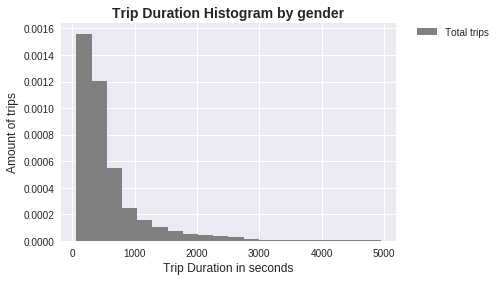

In [14]:
# Make a normalized histogram of the triptime for all users

hist(df1.tripduration, bins = 20, color = "Grey", label = "Total trips", normed = 1)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram by gender", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

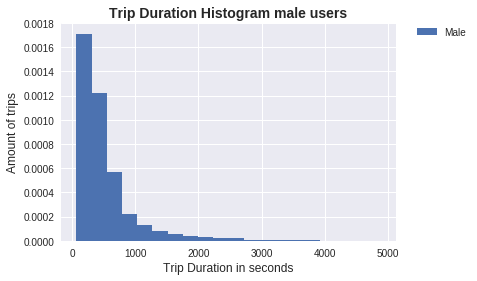

In [15]:
# Make a normalized histogram of the triptime for male users

hist(df2.tripduration, bins = 20, label = "Male", normed=1)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram male users", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

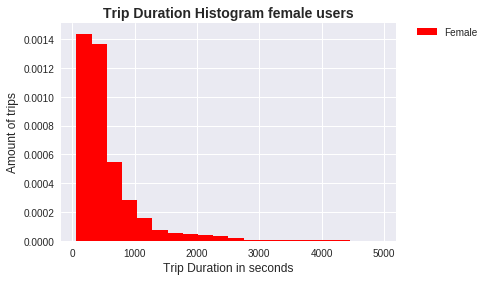

In [16]:
# Make a normalized histogram of the triptime for female users

hist(df3.tripduration, bins = 20, color="red", label = "Female", normed = 1)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram female users", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

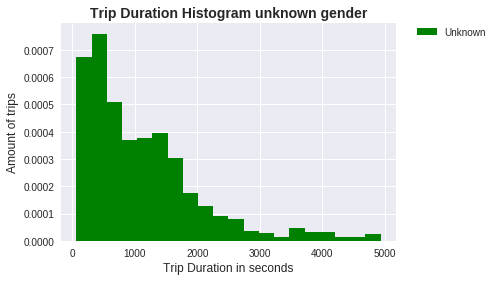

In [17]:
# Make a normalized histogram of the triptime for unknown gender users

hist(df4.tripduration, bins = 20, color="green", label = "Unknown", normed = 1)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram unknown gender", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

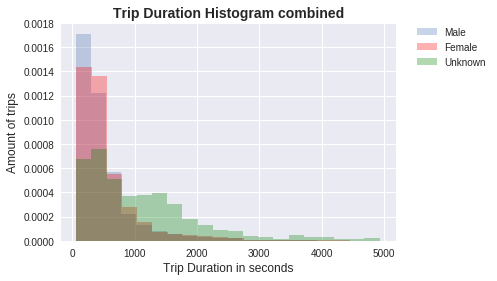

In [18]:
hist(df2.tripduration, bins = 20, label = "Male", normed=1, alpha=0.3)
hist(df3.tripduration, bins = 20, color="red", label = "Female", normed = 1, alpha=0.3)
hist(df4.tripduration, bins = 20, color="green", label = "Unknown", normed = 1, alpha=0.3)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram combined", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Histogram analysis.

From the previous normalized histograms (as recomended by Federica) we can see many things. First of all that the distribution of the samples is not Gaussian, indicating that probably we should not use a parametric statistical test. 

Second of all you can see how in the Male and Female samples most of the trips are in the first bins, meanwhile in the "unknown" gender histogram you can see a much more even distribution, probably indicanting a different user behaviour.  

## Boxplots

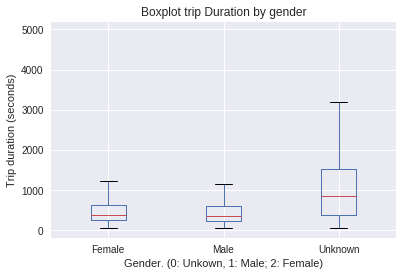

In [26]:

df1.boxplot(column="tripduration",by='gender')

xlabel("Gender. (0: Unkown, 1: Male; 2: Female)")
ylabel("Trip duration (seconds)")
title("Boxplot trip Duration by gender")
suptitle("");

In this boxplot we can see how the male and female distributions are much more narrow than the unknown. Also that both genders have a very similar mean and standard deviation.

In [19]:
# Run statistical model, note that the results cannot be interpreted straight foward because
# the distribution of tripduration is not normal.

lm=smf.ols('tripduration ~ gender',data=df1).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1499.
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:01:11   Log-Likelihood:            -2.5706e+05
No. Observations:               33254   AIC:                         5.141e+05
Df Residuals:                   33251   BIC:                         5.142e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           562.4561      6.533     86.098      0.000     549.652     575.260
gender[T.Male]      -44.7685      7.464     -5.998      0.000     -59.399     -30.138
gender[T.Unknown]   549.7401     12.160     45.210      0.000     525.907     573.574
==============================================================================
Omnibus:                    19768.743   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203845.170
Skew:                           2.745   Prob(JB):                         0.00
Kurtosis:                      13.816   Cond. No.                         5.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the distribution of our sample is not normal the p values cannot be interpreted, although the coeficients can be interpreted. This model shows us that using Female as the base of the comparisson, males tend to have on average trips that are 44.76 seconds shorter. The difference with unknown gender is even bigger, on average the difference is 549.74 seconds (about 9 mins).

Following this interpretation we will run the Kruskal-Wallis test to see if the previous coefficients are significant at a 95% confidence level.

In [20]:
# Run Kruskal-Wallis test for male vs female

scipy.stats.kruskal(df2["tripduration"], df3["tripduration"])

KruskalResult(statistic=108.79325602731829, pvalue=1.8012732256843603e-25)

In [21]:
# Run Kruskal-Wallis test for male vs unknown

scipy.stats.kruskal(df2["tripduration"], df4["tripduration"])

KruskalResult(statistic=1683.0811002262039, pvalue=0.0)

In [22]:
# Run Kruskal-Wallis test for female vs unknown

scipy.stats.kruskal(df3["tripduration"], df4["tripduration"])

KruskalResult(statistic=1073.2148123141978, pvalue=2.1905721476444751e-235)

The tests confirm that for the samples we are using the results are significant at a 95% confidence level because you can reject the null hypothesis (there is no difference in the trip duration for different genders) for every sample comparisson. Consequently you can conclude that there is a difference on the average triptime by gender on citibike users.

In [23]:
# Run Mood's test for male vs female

stat, p, med, tbl = scipy.stats.median_test(df2["tripduration"], df3["tripduration"])

print p
print tbl

3.31321115942e-16
[[11298  3846]
 [11964  3262]]


In [24]:
# Run Mood's test for male vs unknown

stat, p, med, tbl = scipy.stats.median_test(df2["tripduration"], df4["tripduration"])

print p
print tbl

1.27284751431e-199
[[10835  2202]
 [12427   682]]


In [25]:
# Run Mood's test for female vs unknown

stat, p, med, tbl = scipy.stats.median_test(df3["tripduration"], df4["tripduration"])

print p
print tbl

4.93259447507e-153
[[2956 2039]
 [4152  845]]


Mood's tests confirm what we already saw using the Kurskal-Wallis tests. This test was also included based on Federica's recommendation.

# Conclusions

When comparing tripduration by gender for citibike you can see that there is a statistical difference between male and female users of around 44 seconds (females make longer trips). The problem with this result is that 44 seconds does not represent a long trip distance when you consider the average speed on a citibike, on top of that, probably the average speed is also affected by the gender. The implications of this is that you cannot be certain of a difference in the distance travelled by gender just by looking at the difference on the average trip time for male and female users.

The more interesting result comes when you compare the travel time of known gender users against unknown. The difference is of about 9 minutes when compared to female users, which could very probably represent a difference on the distance travelled by registered users against unregistered users. What you can see is that unregistered users use the bike for a longer period of time on average, which would account for longer distances travelled in the bicycle. This depicts a behaviour difference between registered and unregistered users, probably comming from the usage given to the system, registered users may base citibike usage on a practical mean of transportation for daily travel, while unregistered users might think of it as a good mean of transportation for tourism purposes or exceptional circumstances.

There is of course more questions to be answered to understand the reasons why the behaviour of registered and unregistered users is different, but with the previous analysis you can see and statistically prove that registered and non-registered users approach citibike differently.